<a href="https://colab.research.google.com/github/stephaniediamond3/DATA71200/blob/main/data71200dec9lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 14.4 MB/s eta 0:00:00


# Load wine dataset

In [3]:
from sklearn.datasets import load_wine
dataset = load_wine()

# Testing/Training Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, random_state=66,test_size=0.2)

# Scale the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Run PCA on data

In [8]:
# import PCA library
from sklearn.decomposition import PCA

# instantiate an instance of PCA with 2
pca = PCA(n_components=2)

# fit on and transforming the training set and then transform the test set
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# k-Means

In [7]:
# import library
from sklearn.cluster import KMeans


## Run on original data

Text(0, 0.5, 'Feature 1')

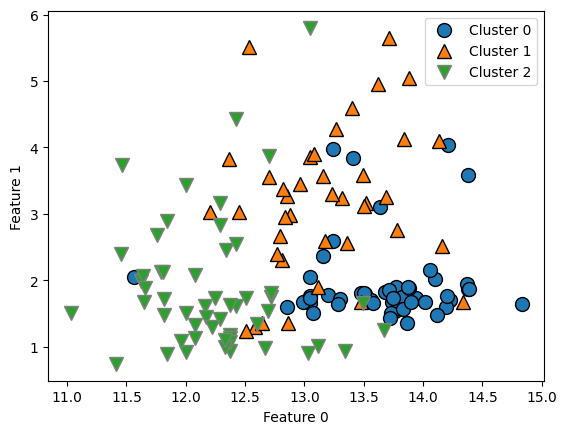

In [12]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


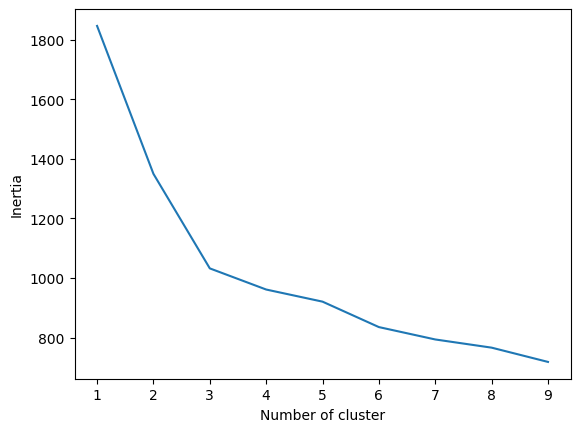

In [16]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train_scaled)
    inertiaVals[k] = kmeansTmp.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

## Run on data after PCA

Text(0, 0.5, 'Feature 1')

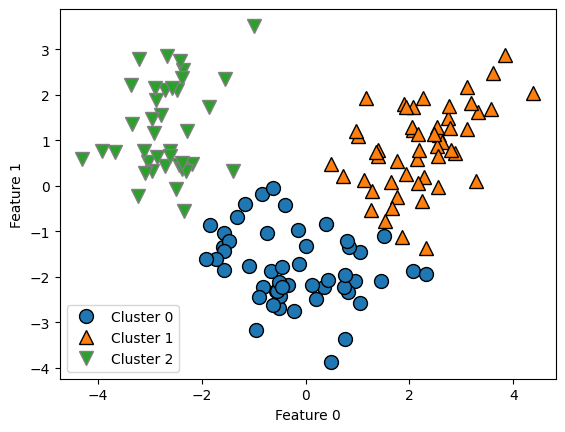

In [14]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_pca)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


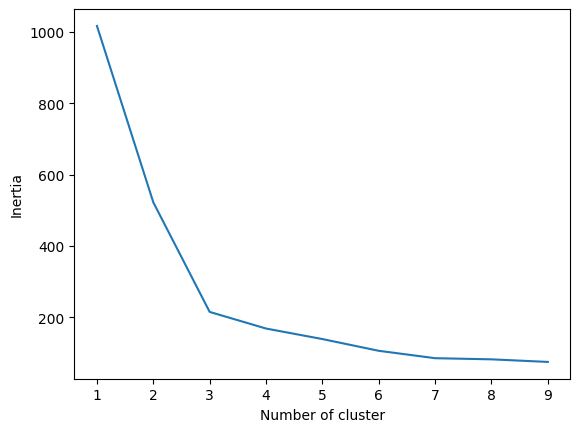

In [15]:
# elbow visualization
inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca)
    inertiaVals[k] = kmeansTmp.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()


# Aggolmerate/Hierarchical

In [9]:
# import library
from sklearn.cluster import AgglomerativeClustering

## Run on original data

Text(0, 0.5, 'Feature 1')

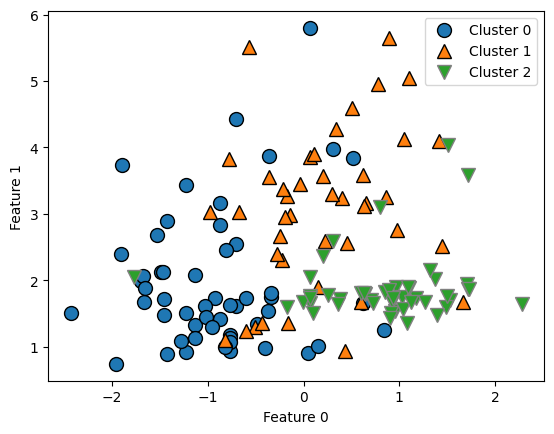

In [17]:
# instantiate an instance of the algorithm
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_scaled)

# plot the cluster assignments
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Run on data after PCA

Text(0, 0.5, 'Feature 1')

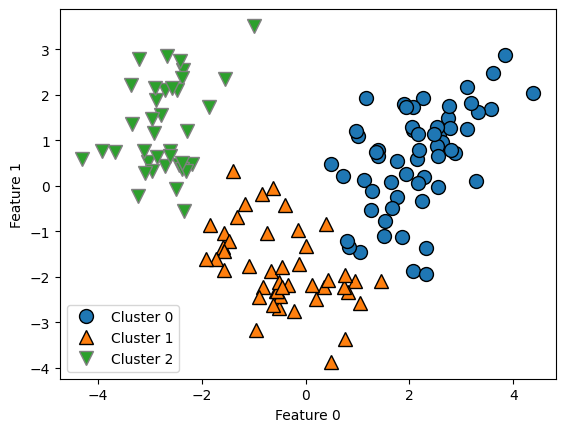

In [11]:
# instantiate an instance of the algorithm
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_pca)

# plot the cluster assignments
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


# DBSCAN

In [18]:
# import the library
from sklearn.cluster import DBSCAN

## Run on original data

Text(0, 0.5, 'Feature 1')

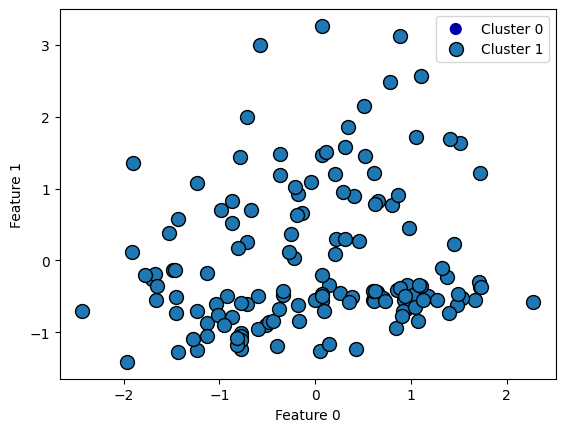

In [19]:
# instantiate an instance of the algorithm
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train_scaled)

# plot the cluster assignments
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


## Run on data after PCA

Text(0, 0.5, 'Feature 1')

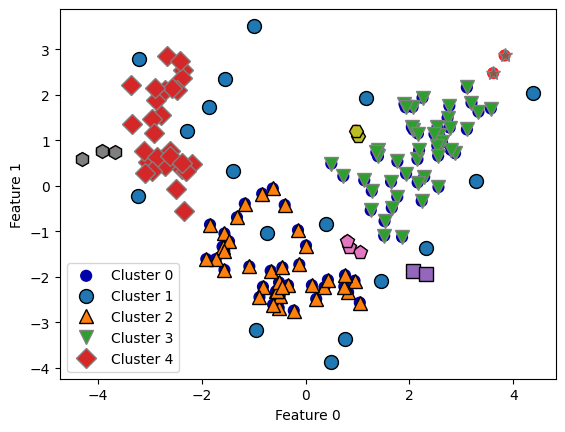

In [20]:
# instantiate an instance of the algorithm
dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train_pca)

# plot the cluster assignments
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




# Calculate ARI and Silhouette Coefficient

## ARI - Original Data

In [ ]:
# import library

# create subplot

# make a list of algorithms to use

# create a random cluster assignment for reference

# plot random assignment


## ARI - PCA Data

In [ ]:
# create subplot

# make a list of algorithms to use

# create a random cluster assignment for reference

# plot random assignment


## Silhouette Coefficient - Original Data

In [ ]:
# import library

# create subplot

# create a random cluster assignment for reference

# plot random assignment


## Silhouette Coefficient - PCA

In [ ]:
# create subplot

# create a random cluster assignment for reference

# plot random assignment
